<a href="https://colab.research.google.com/github/Chinemelu4/Projects/blob/main/Cognizant_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [4]:
path = "/content/drive/MyDrive/New folder/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [5]:
df.shape

(7829, 9)

In [6]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [7]:
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [8]:
df.describe(percentiles=[.25,.5,.75,.99])

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
99%,20.490000,4.000000,76.760000
max,23.990000,4.000000,95.960000


In [109]:
df['timestamp']=pd.to_datetime(df['timestamp'],infer_datetime_format=True)

In [110]:
df['timestamp'].max(),df['timestamp'].min()

(Timestamp('2022-03-07 19:59:54'), Timestamp('2022-03-01 09:00:13'))

In [25]:
Duration=df['timestamp'].max()-df['timestamp'].min()
print(f'The data set covers a period of {Duration.days} days')

The data set covers a period of 6 days


In [9]:
def find_boundaries(df, variables):
    #let's find the IQR (Inter Quantile Range)
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    
    return lower_boundary,  upper_boundary

In [10]:
for i in df.columns:
  if df[i].dtype!="O":
    print(f'The outliers boundaries for {i} are {find_boundaries(df, i)}\n')

The outliers boundaries for unit_price are (-6.809999999999999, 21.99)

The outliers boundaries for quantity are (-3.5, 8.5)

The outliers boundaries for total are (-26.279999999999994, 61.31999999999999)



In [11]:
for i in df.columns:
  if df[i].dtype!="O":
    value=df[df[i]>find_boundaries(df, i)[1]].shape[0]
    print(f'{i} has {value} values which are outliers\n')

unit_price has 31 values which are outliers

quantity has 0 values which are outliers

total has 300 values which are outliers



In [12]:
for i in df.columns:
  if df[i].dtype=="O":
    if len(df[i].unique())>25:
      print(f'{i} has {len(df[i].unique())} unique values\n')
    else:
      print(f'{i} has {len(df[i].unique())} unique values and they are: \n {df[i].unique()}\n')

transaction_id has 7829 unique values

timestamp has 7738 unique values

product_id has 300 unique values

category has 22 unique values and they are: 
 ['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']

customer_type has 5 unique values and they are: 
 ['gold' 'standard' 'premium' 'basic' 'non-member']

payment_type has 4 unique values and they are: 
 ['e-wallet' 'debit card' 'cash' 'credit card']



In [18]:
df['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [120]:
cust_count=df['customer_type'].value_counts().to_frame().reset_index()
cust_count.columns=['Customer type','Count']
cust_count['Percentage']=round(cust_count['Count']/cust_count['Count'].sum()*100,2)
cust_count

,Customer type,Count,Percentage
0,non-member,1601,20.45
1,standard,1595,20.37
2,premium,1590,20.31
3,basic,1526,19.49
4,gold,1517,19.38


In [126]:
payment_count=df['payment_type'].value_counts().to_frame().reset_index()
payment_count.columns=['payment type','Count']
payment_count['Percentage']=round(cust_count['Count']/cust_count['Count'].sum()*100,2)
payment_count

,payment type,Count,Percentage
0,cash,2027,20.45
1,credit card,1949,20.37
2,e-wallet,1935,20.31
3,debit card,1918,19.49


In [123]:
cust_total=df.groupby('customer_type')['total'].sum().to_frame().sort_values(by='total',ascending=False)
cust_total['Percentage']=round(cust_total['total']/cust_total['total'].sum()*100,2)
cust_total

,total,Percentage
customer_type,,
non-member,31755.24,20.58
premium,31655.68,20.51
standard,31388.78,20.34
gold,29939.99,19.40
basic,29569.16,19.16


In [124]:
pay_total=df.groupby('payment_type')['total'].sum().to_frame().sort_values(by='total',ascending=False)
pay_total['Percentage']=round(pay_total['total']/pay_total['total'].sum()*100,2)
pay_total

,total,Percentage
payment_type,,
cash,41287.31,26.76
credit card,39309.52,25.47
debit card,37010.67,23.98
e-wallet,36701.35,23.78


In [108]:
cust_qua=df.groupby('customer_type')['quantity'].sum().to_frame().sort_values(by='quantity',ascending=False)
cust_qua

,quantity
customer_type,
standard,4032
premium,3992
non-member,3976
basic,3794
gold,3791


In [132]:
Cat_income=df.groupby('category')['total'].sum().to_frame().sort_values(by='total',ascending=False)
Cat_income['Percentage']=round(Cat_income['total']/Cat_income['total'].sum()*100,2)
Cat_income

,total,Percentage
category,,
kitchen,14456.65,9.37
meat,14102.31,9.14
seafood,10754.81,6.97
medicine,10393.78,6.74
beverages,9930.64,6.44
cleaning products,9483.75,6.15
baked goods,8348.21,5.41
dairy,7551.60,4.89
refrigerated items,7436.45,4.82


In [30]:
pd.crosstab(df['customer_type'],df['payment_type'],margins=True)

payment_type,cash,credit card,debit card,e-wallet,All
customer_type,,,,,
basic,373,386,391,376,1526
gold,358,389,352,418,1517
non-member,434,396,402,369,1601
premium,434,382,388,386,1590
standard,428,396,385,386,1595
All,2027,1949,1918,1935,7829


In [ ]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,Date,Time
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02,09:51:38
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06,10:33:59
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04,17:20:21
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02,17:23:58
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022-03-05,14:32:43


---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [ ]:
!pip install seaborn

In [52]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [53]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 3, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  corr.style.background_gradient(cmap='coolwarm')

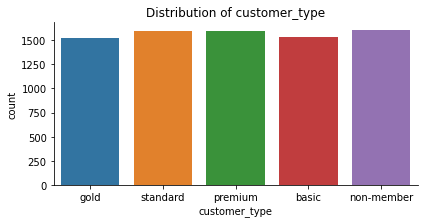

In [54]:
plot_categorical_distribution(df,"customer_type")

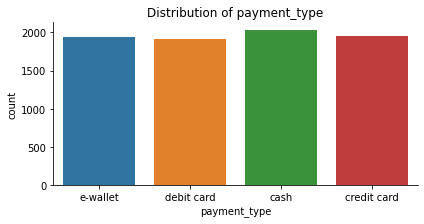

In [55]:
plot_categorical_distribution(df,"payment_type")

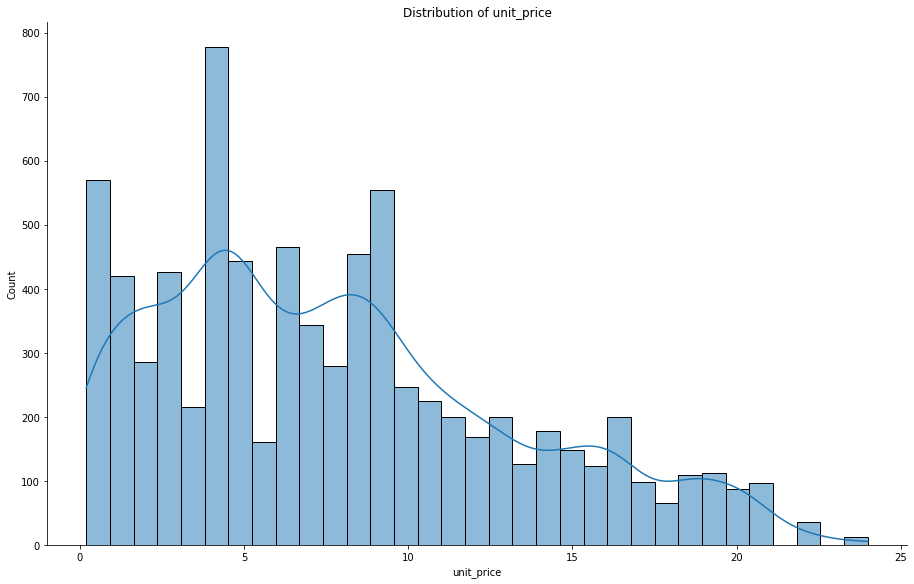

In [57]:
plot_continuous_distribution(df,'unit_price')

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [61]:
Cat_income["cum_percentage"] = round(Cat_income["total"].cumsum()/Cat_income["total"].sum()*100,2)


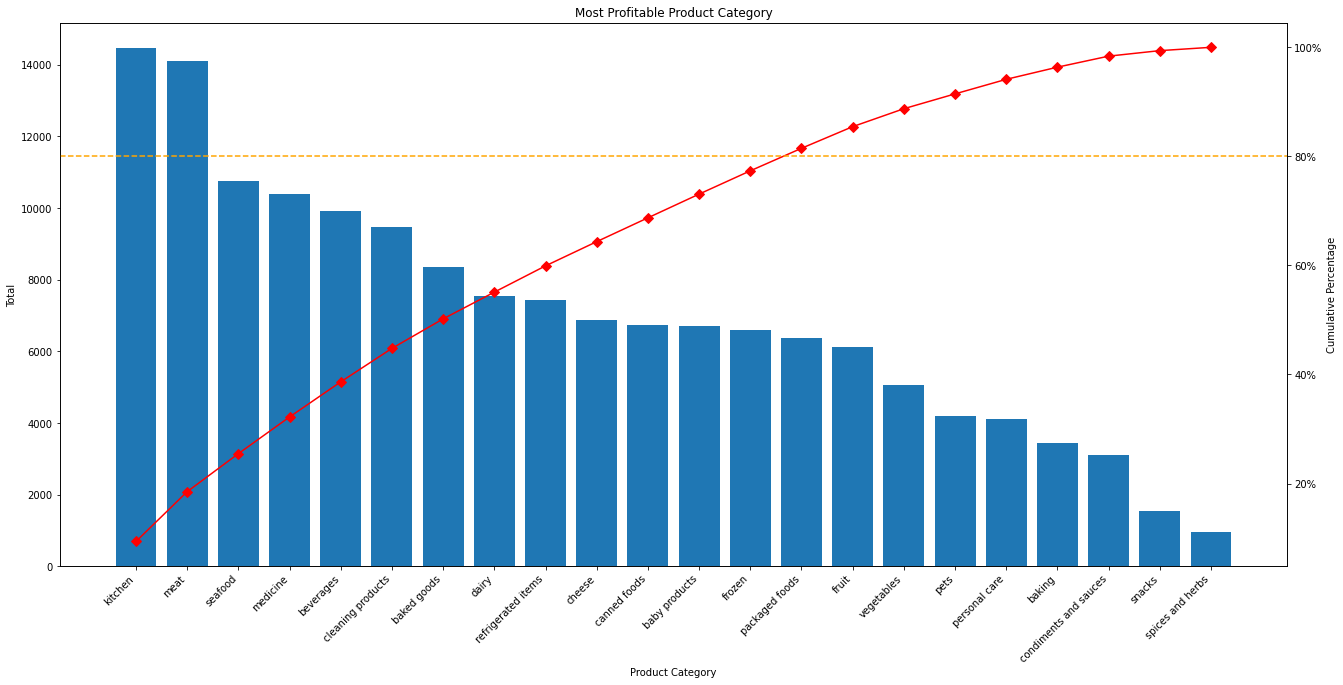

In [62]:
fig, ax = plt.subplots(figsize=(22,10))

ax.bar(Cat_income.index, Cat_income["total"])
ax.set_title("Most Profitable Product Category")
ax.set_xlabel("Product Category")
ax.set_ylabel("Total");
xticklabels =Cat_income.index
ax.set_xticklabels(xticklabels, rotation = 45, ha="right")

ax2 = ax.twinx()
ax2.plot(Cat_income.index, Cat_income["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");


In [77]:

cust_payment_tab=pd.crosstab(df['payment_type'],df['customer_type'])


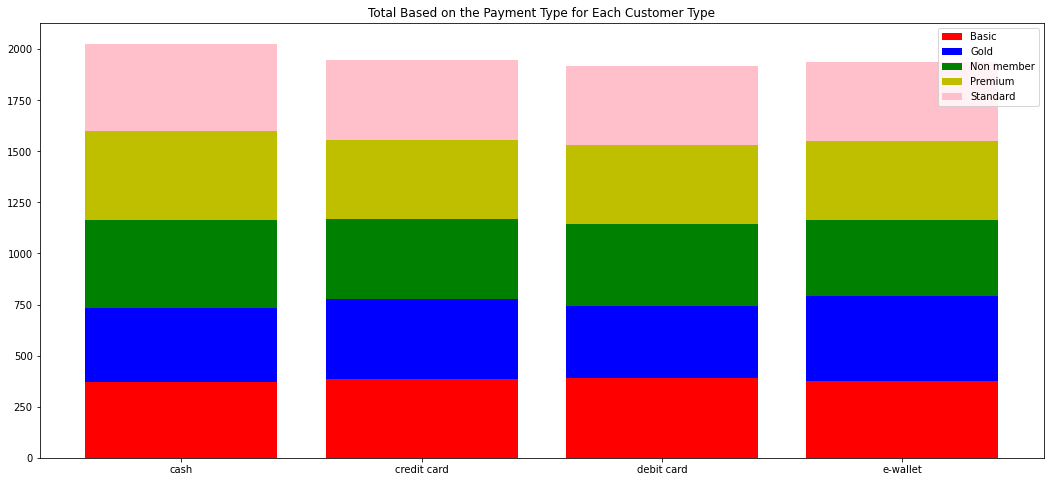

In [128]:
plt.figure(figsize=[18,8])
plt.bar(cust_payment_tab.index, cust_payment_tab['basic'], color='r',label='Basic')
plt.bar(cust_payment_tab.index, cust_payment_tab['gold'], bottom=cust_payment_tab['basic'], color='b',label='Gold')
plt.bar(cust_payment_tab.index, cust_payment_tab['non-member'], bottom=cust_payment_tab['basic']+cust_payment_tab['gold'], color='g',label='Non member')
plt.bar(cust_payment_tab.index, cust_payment_tab['premium'], bottom=cust_payment_tab['basic']+cust_payment_tab['gold']+cust_payment_tab['non-member'], color='y',label='Premium')
plt.bar(cust_payment_tab.index, cust_payment_tab['standard'], bottom=cust_payment_tab['basic']+cust_payment_tab['gold']+cust_payment_tab['non-member']+cust_payment_tab['premium'], color='pink',label='Standard')
plt.title('Total Based on the Payment Type for Each Customer Type')
plt.legend()
plt.show()

In [78]:
pay_total

,total
payment_type,
cash,41287.31
credit card,39309.52
debit card,37010.67
e-wallet,36701.35


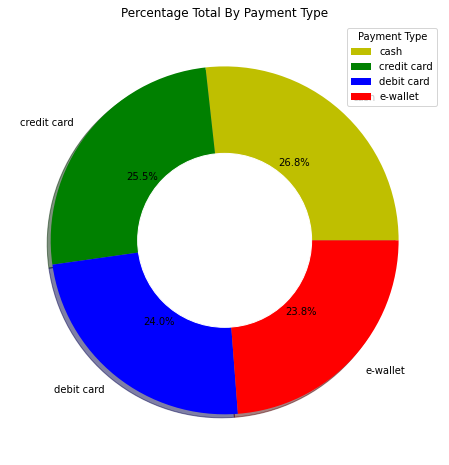

In [107]:
plt.figure(figsize=[18,8])
metrics =pay_total.total
plt.pie(metrics, shadow=True, colors=["y","g",'b','r'], labels=pay_total.index,autopct='%1.1f%%')
donut = plt.Circle( (0,0), 0.5, color='white')
plt.title('Percentage Total By Payment Type')
plt.legend(loc="upper right", title="Payment Type")
p = plt.gcf()
p.gca().add_artist(donut);

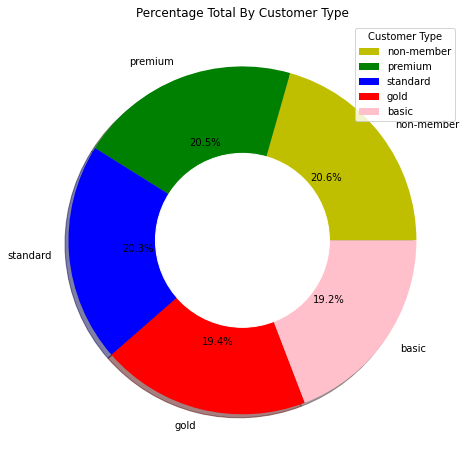

In [106]:
plt.figure(figsize=[18,8])
metrics =cust_total.total
plt.pie(metrics, shadow=True, colors=["y","g",'b','r','pink'], labels=cust_total.index,autopct='%1.1f%%')
donut = plt.Circle( (0,0), 0.5, color='white')
plt.title('Percentage Total By Customer Type')
plt.legend(loc="upper right", title="Customer Type")
p = plt.gcf()
p.gca().add_artist(donut);

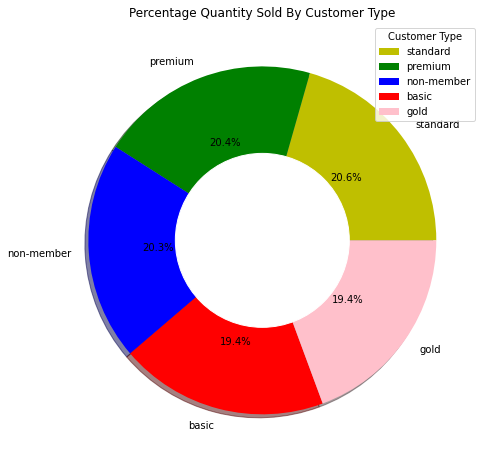

In [104]:
plt.figure(figsize=[18,8])
metrics =cust_qua.quantity
plt.pie(metrics, shadow=True, colors=["y","g",'b','r','pink'], labels=cust_qua.index,autopct='%1.1f%%')
donut = plt.Circle( (0,0), 0.5, color='white')
plt.title('Percentage Quantity Sold By Customer Type')
plt.legend(loc="upper right", title="Customer Type")
p = plt.gcf()
p.gca().add_artist(donut);

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

